# summary cell weight data
after running the qp retrieval, segmentation and dry-weight calculation, load csv cell data summaries, group them by cnodition and compare results

In [1]:
import pandas as pd
import os
import numpy as np

from tkinter import filedialog
from tkinter import *

import matplotlib.pyplot as plt

In [2]:
def select_files(title="Select cell mass csv files "):
    root = Tk()
    root.withdraw()  # Hide the root window
    file_paths = filedialog.askopenfilenames(title=title, filetypes=[("csv files", "*.csv"), ("All files", "*.*")])
    return list(file_paths)

def load_files_to_df(file_list):
    df_list = []
    for file in file_list:
        df = pd.read_csv(file)
        df_list.append(df)
    combined_df = pd.concat(df_list, ignore_index=True)
    return combined_df

## select files

In [3]:
c_450 = select_files(title="Select 450 cell mass csv files ")
c_ctl = select_files(title="Select CTL cell mass csv files ")

## load files to dataframe 

In [4]:
c_c450_df = load_files_to_df(c_450)
c_ctl_df = load_files_to_df(c_ctl)

## summary per df 

In [5]:
c_c450_df.head(5)

,label,centroid_row,centroid_col,area_cell_m2,area_nuc_m2,area_cyto_m2,mass_cell_kg,mass_nuc_kg,mass_cyto_kg,mass_cell_pg,mass_nuc_pg,mass_cyto_pg
0,1,235.142299,883.794442,3.601664e-10,1.059584e-10,2.542080e-10,5.164081e-10,1.494020e-10,3.670062e-10,516.408141,149.401980,367.006161
1,2,351.213107,814.385961,3.847680e-10,9.676800e-11,2.880000e-10,4.423215e-10,1.124722e-10,3.298494e-10,442.321547,112.472179,329.849368
2,3,341.404892,129.267499,2.951424e-10,7.552000e-11,2.196224e-10,3.289855e-10,8.368901e-11,2.452965e-10,328.985481,83.689006,245.296475
3,5,827.741631,472.105869,3.716608e-10,8.289280e-11,2.887680e-10,4.842984e-10,1.078362e-10,3.764622e-10,484.298424,107.836196,376.462227
4,6,902.708622,608.128890,5.585152e-10,8.273920e-11,4.757760e-10,8.014555e-10,1.192223e-10,6.822332e-10,801.455521,119.222320,682.233201


In [6]:
c_c450_df.describe()

,label,centroid_row,centroid_col,area_cell_m2,area_nuc_m2,area_cyto_m2,mass_cell_kg,mass_nuc_kg,mass_cyto_kg,mass_cell_pg,mass_nuc_pg,mass_cyto_pg
count,30.000000,30.000000,30.000000,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,30.000000,30.000000,30.000000
mean,3.933333,501.766018,544.792766,5.179887e-10,1.049207e-10,4.133675e-10,5.828209e-10,1.222581e-10,4.610417e-10,582.820886,122.258144,461.041726
std,2.638355,235.542208,272.509489,1.772060e-10,2.767374e-11,1.696133e-10,2.542022e-10,5.398975e-11,2.237109e-10,254.202185,53.989746,223.710853
min,1.000000,147.630605,104.447337,2.951424e-10,6.666240e-11,2.061568e-10,1.483115e-10,3.254352e-11,1.075048e-10,148.311541,32.543518,107.504848
25%,2.000000,293.287451,292.550125,3.774272e-10,8.483200e-11,2.842176e-10,4.439129e-10,8.935461e-11,3.202700e-10,443.912932,89.354606,320.269988
50%,3.000000,475.654065,593.269285,4.733440e-10,1.009280e-10,3.756672e-10,5.303928e-10,1.201322e-10,4.183268e-10,530.392817,120.132238,418.326794
75%,5.750000,694.512373,795.843054,6.005504e-10,1.151360e-10,4.905792e-10,7.641896e-10,1.536878e-10,5.824867e-10,764.189623,153.687783,582.486656
max,11.000000,902.708622,916.052292,9.643264e-10,1.773568e-10,8.480000e-10,1.174824e-09,2.585734e-10,1.034680e-09,1174.824082,258.573363,1034.679712


In [7]:
c_ctl_df.head(5)

,label,centroid_row,centroid_col,area_cell_m2,area_nuc_m2,area_cyto_m2,mass_cell_kg,mass_nuc_kg,mass_cyto_kg,mass_cell_pg,mass_nuc_pg,mass_cyto_pg
0,1,161.284875,742.462963,6.276096e-10,9.505280e-11,5.325568e-10,2.958074e-10,4.834710e-11,2.474603e-10,295.807376,48.347096,247.460280
1,3,216.813626,216.863261,4.775936e-10,8.225280e-11,3.953408e-10,3.309259e-10,6.171672e-11,2.692092e-10,330.925908,61.716717,269.209191
2,4,261.713625,421.129329,5.809664e-10,1.414400e-10,4.395264e-10,2.860162e-10,7.848053e-11,2.075357e-10,286.016223,78.480531,207.535692
3,6,339.594355,578.253468,3.174400e-10,8.079360e-11,2.375680e-10,1.732887e-10,4.561512e-11,1.279482e-10,173.288727,45.615124,127.948241
4,7,508.835543,181.780415,6.083328e-10,6.986240e-11,5.384704e-10,5.802488e-10,6.684268e-11,5.134061e-10,580.248796,66.842685,513.406111


In [8]:
c_ctl_df.describe()

,label,centroid_row,centroid_col,area_cell_m2,area_nuc_m2,area_cyto_m2,mass_cell_kg,mass_nuc_kg,mass_cyto_kg,mass_cell_pg,mass_nuc_pg,mass_cyto_pg
count,73.000000,73.000000,73.000000,7.300000e+01,7.300000e+01,7.300000e+01,7.300000e+01,7.300000e+01,7.300000e+01,73.000000,73.000000,73.000000
mean,16.397260,533.924363,498.473723,4.669163e-10,9.213966e-11,3.751726e-10,4.169692e-10,8.145000e-11,3.359672e-10,416.969221,81.450001,335.967219
std,10.354467,263.438877,276.339015,1.482009e-10,3.108346e-11,1.376725e-10,2.407595e-10,4.566564e-11,2.072858e-10,240.759495,45.665640,207.285840
min,1.000000,36.370848,31.065023,2.573824e-10,0.000000e+00,1.808384e-10,1.270495e-10,0.000000e+00,8.650967e-11,127.049492,0.000000,86.509673
25%,8.000000,336.323481,253.370921,3.375104e-10,7.523840e-11,2.555904e-10,2.484747e-10,4.669760e-11,1.940415e-10,248.474687,46.697596,194.041468
50%,14.000000,515.666415,473.637812,4.569600e-10,9.080320e-11,3.514624e-10,3.473859e-10,6.799501e-11,2.912718e-10,347.385902,67.995010,291.271817
75%,26.000000,748.022199,706.986660,5.796352e-10,1.133056e-10,4.781312e-10,5.367364e-10,1.142988e-10,3.961450e-10,536.736372,114.298812,396.145005
max,38.000000,976.703848,996.501492,9.374976e-10,2.371584e-10,8.241920e-10,1.366879e-09,2.402012e-10,1.201497e-09,1366.879155,240.201211,1201.496651


In [ ]:
keys = ['cell', 'nuc', 'cyto']

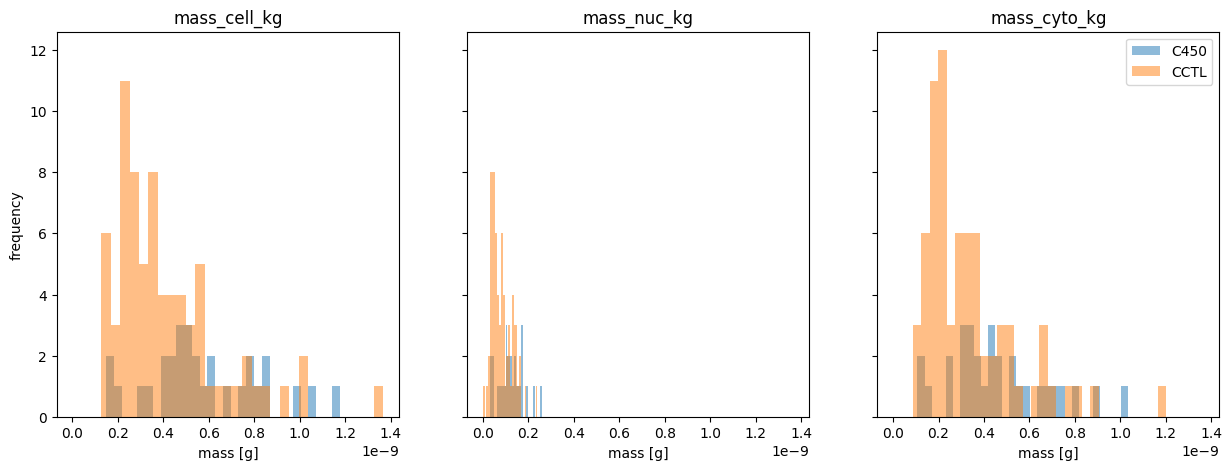

In [31]:
f, ax = plt.subplots(ncols=len(keys), nrows=1, sharey=True, sharex=True, figsize=(15,5))

axs= ax.flatten()
for i, k in enumerate(keys):
    axs[i].hist(c_c450_df[f'mass_{k}_kg'], bins=30, alpha=0.5, label='C450')
    axs[i].hist(c_ctl_df[f'mass_{k}_kg'], bins=30, alpha=0.5, label='CCTL')
    axs[i].set_xlabel('mass [g]')
    axs[i].title.set_text(f'mass_{k}_kg')

axs[0].set_ylabel('frequency')
plt.legend()



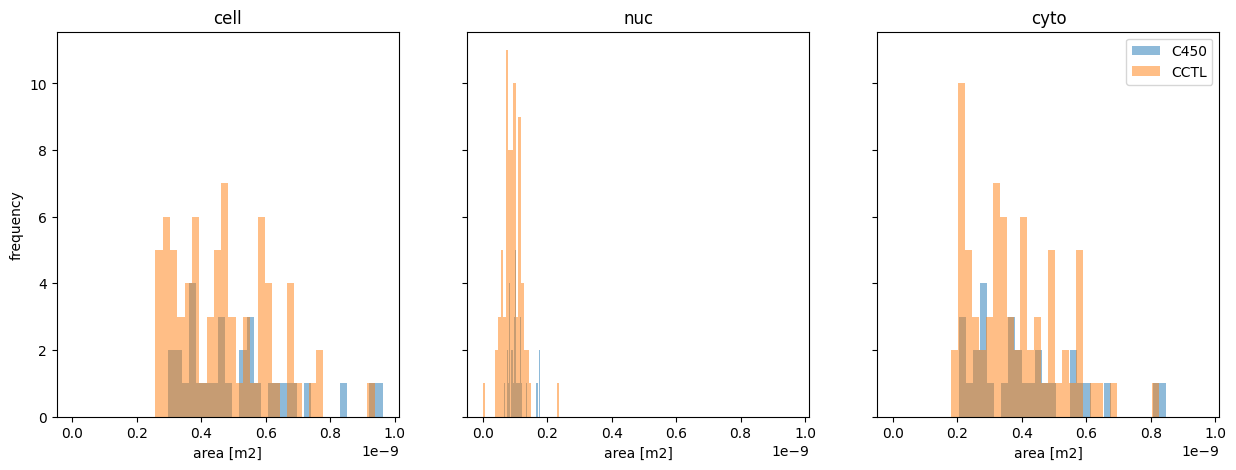

In [32]:
f, ax = plt.subplots(ncols=len(keys), nrows=1, sharey=True, sharex=True, figsize=(15,5))

axs= ax.flatten()
for i, k in enumerate(keys):
    axs[i].hist(c_c450_df[f'area_{k}_m2'], bins=30, alpha=0.5, label='C450')
    axs[i].hist(c_ctl_df[f'area_{k}_m2'], bins=30, alpha=0.5, label='CCTL')
    axs[i].set_xlabel('area [m2]')
    axs[i].title.set_text(f'{k}')

axs[0].set_ylabel('frequency')
plt.legend()

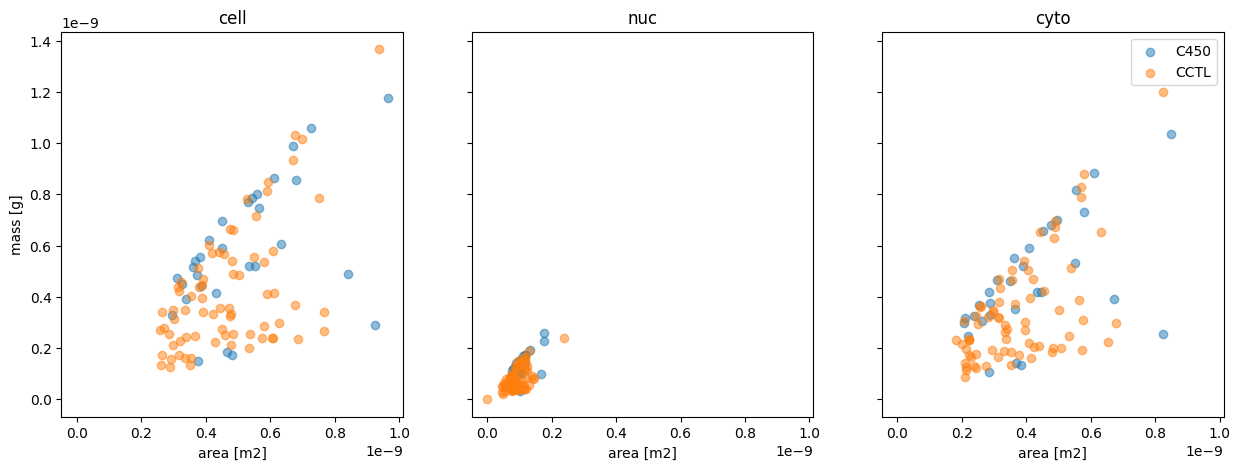

In [33]:
f, ax = plt.subplots(ncols=len(keys), nrows=1, sharey=True, sharex=True, figsize=(15,5))

axs= ax.flatten()
for i, k in enumerate(keys):
    axs[i].scatter(c_c450_df[f'area_{k}_m2'], c_c450_df[f'mass_{k}_kg'], alpha=0.5, label='C450')
    axs[i].scatter(c_ctl_df[f'area_{k}_m2'], c_ctl_df[f'mass_{k}_kg'], alpha=0.5, label='CCTL')
    axs[i].set_xlabel('area [m2]')
    axs[i].title.set_text(f'{k}')

axs[0].set_ylabel('mass [g]')
plt.legend()

### density

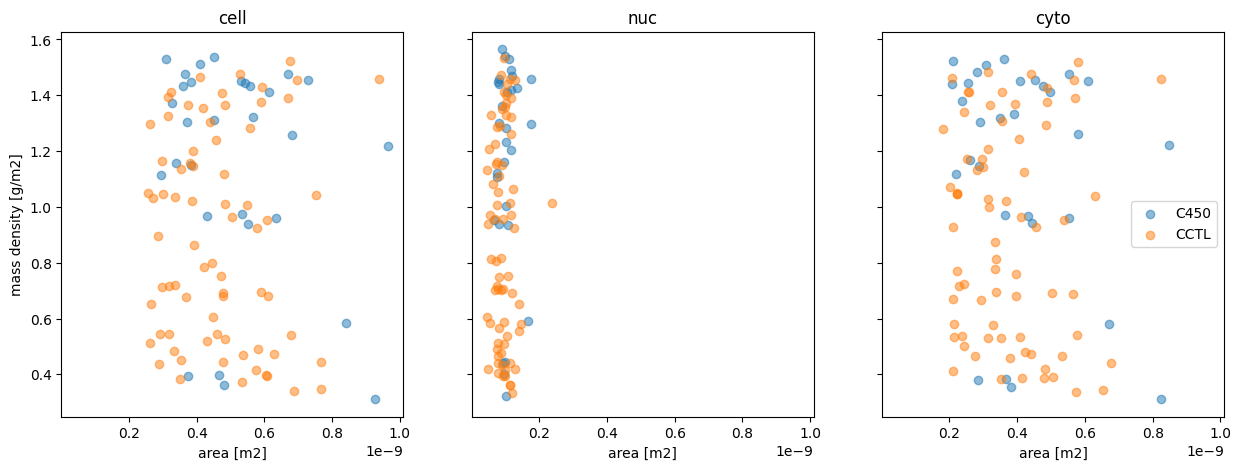

In [34]:
f, ax = plt.subplots(ncols=len(keys), nrows=1, sharey=True, sharex=True, figsize=(15,5))

axs= ax.flatten()
for i, k in enumerate(keys):
    axs[i].scatter(c_c450_df[f'area_{k}_m2'], c_c450_df[f'mass_{k}_kg']/c_c450_df[f'area_{k}_m2'], alpha=0.5, label='C450')
    axs[i].scatter(c_ctl_df[f'area_{k}_m2'], c_ctl_df[f'mass_{k}_kg']/c_ctl_df[f'area_{k}_m2'], alpha=0.5, label='CCTL')
    axs[i].set_xlabel('area [m2]')
    axs[i].title.set_text(f'{k}')

axs[0].set_ylabel('mass density [g/m2]')
plt.legend()

Text(0, 0.5, 'frequency')

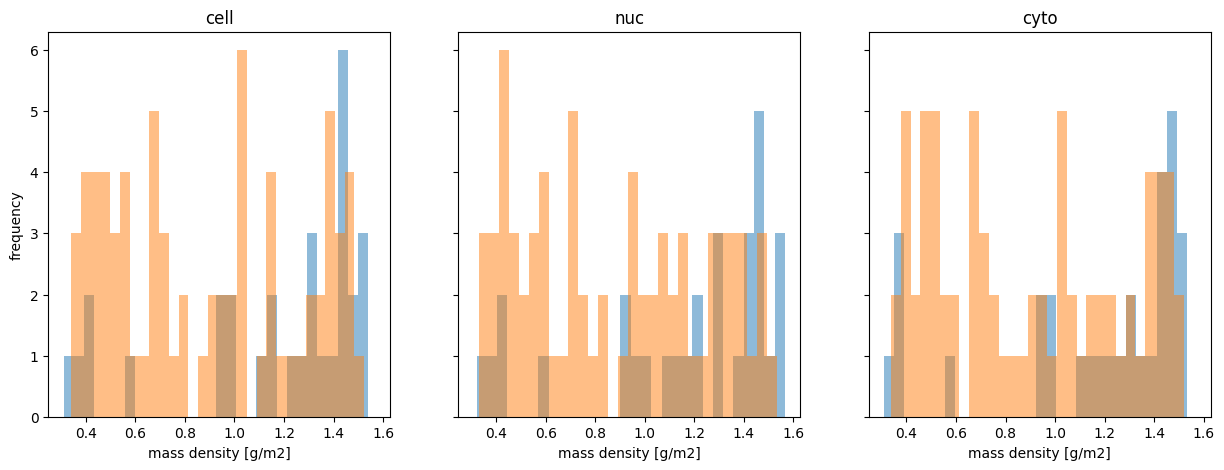

In [29]:
f, ax = plt.subplots(ncols=len(keys), nrows=1, sharey=True, sharex=True, figsize=(15,5))

axs= ax.flatten()
for i, k in enumerate(keys):
    axs[i].hist(c_c450_df[f'mass_{k}_kg']/c_c450_df[f'area_{k}_m2'], bins=30, alpha=0.5, label='C450')
    axs[i].hist(c_ctl_df[f'mass_{k}_kg']/c_ctl_df[f'area_{k}_m2'], bins=30, alpha=0.5, label='CCTL')
    axs[i].set_xlabel('mass density [g/m2]')
    axs[i].title.set_text(f'{k}')

axs[0].set_ylabel('frequency')

# archive

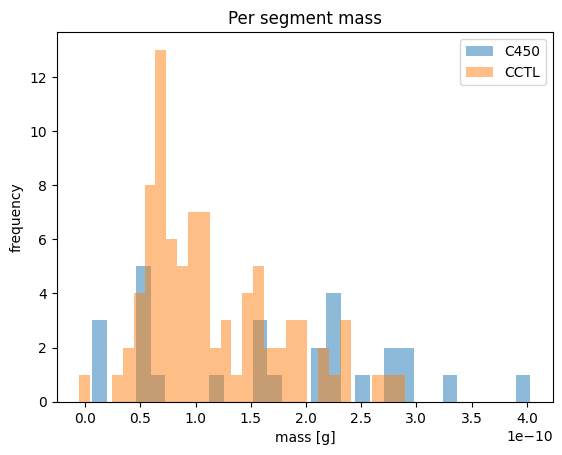

In [9]:
plt.hist(c_c450_df['mass'], bins=30, alpha=0.5, label='C450')
plt.hist(c_ctl_df['mass'], bins=30, alpha=0.5, label='CCTL')
plt.xlabel('mass [g]')
plt.ylabel('frequency')
plt.legend()
plt.title('Per segment mass')
plt.show()

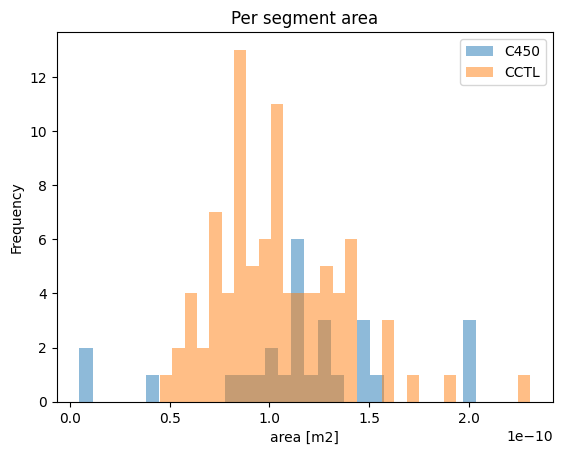

In [10]:
plt.hist(c_c450_df['area'], bins=30, alpha=0.5, label='C450')
plt.hist(c_ctl_df['area'], bins=30, alpha=0.5, label='CCTL')
plt.xlabel('area [m2]')
plt.ylabel('Frequency')
plt.legend()
plt.title('Per segment area')
plt.show()

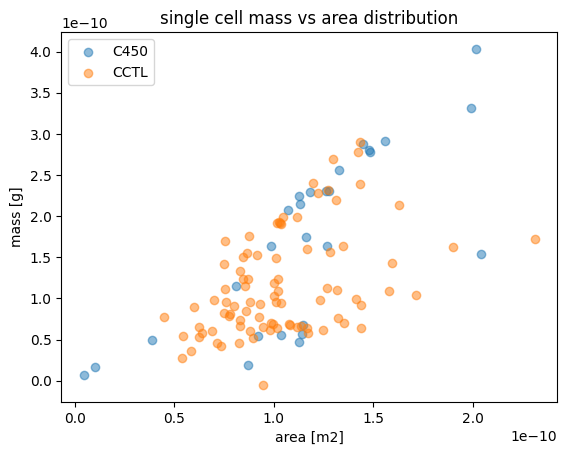

In [11]:
plt.scatter(c_c450_df['area'], c_c450_df['mass'], alpha=0.5, label='C450')
plt.scatter(c_ctl_df['area'], c_ctl_df['mass'], alpha=0.5, label='CCTL')
plt.xlabel('area [m2]')
plt.ylabel('mass [g]')
plt.legend()
plt.title('single cell mass vs area distribution')
plt.show()

## densities

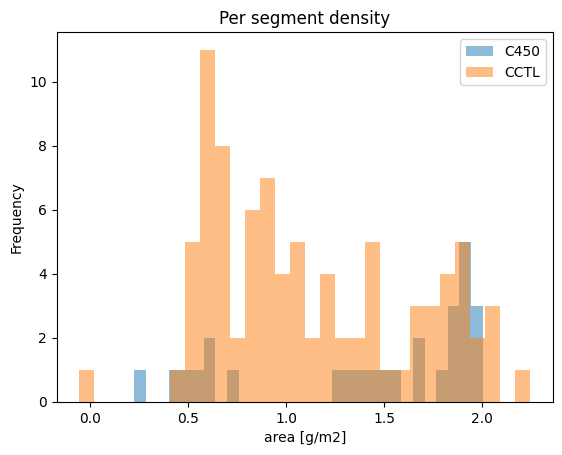

In [14]:
plt.hist(c_c450_df['mass']/c_c450_df['area'], bins=30, alpha=0.5, label='C450')
plt.hist(c_ctl_df['mass']/c_ctl_df['area'], bins=30, alpha=0.5, label='CCTL')
plt.xlabel('area [g/m2]')
plt.ylabel('Frequency')
plt.legend()
plt.title('Per segment density')
plt.show()

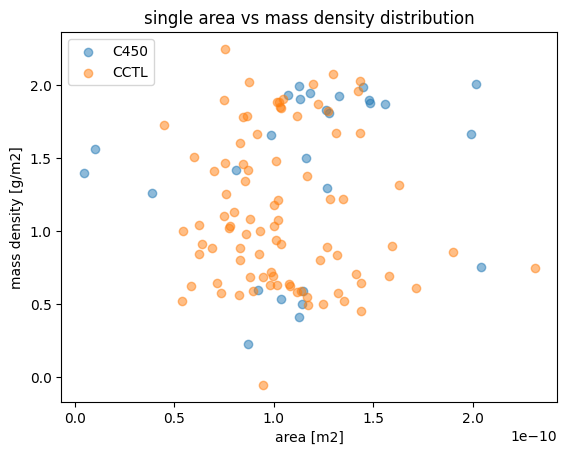

In [17]:
plt.scatter(c_c450_df['area'], c_c450_df['mass']/c_c450_df['area'], alpha=0.5, label='C450')
plt.scatter(c_ctl_df['area'], c_ctl_df['mass']/c_ctl_df['area'], alpha=0.5, label='CCTL')
plt.xlabel('area [m2]')
plt.ylabel('mass density [g/m2]')
plt.legend()
plt.title('single area vs mass density distribution')
plt.show()